In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_train = np.load("mnist_train_data.npy") # La cantidad total de imágenes
Y_train = np.load("mnist_train_labels.npy")

print(f"Imagenes de entrenamiento: {X_train.shape}")
print(f"Número de clases: {np.unique(Y_train)}")

Imagenes de entrenamiento: (60000, 28, 28)
Número de clases: [0 1 2 3 4 5 6 7 8 9]


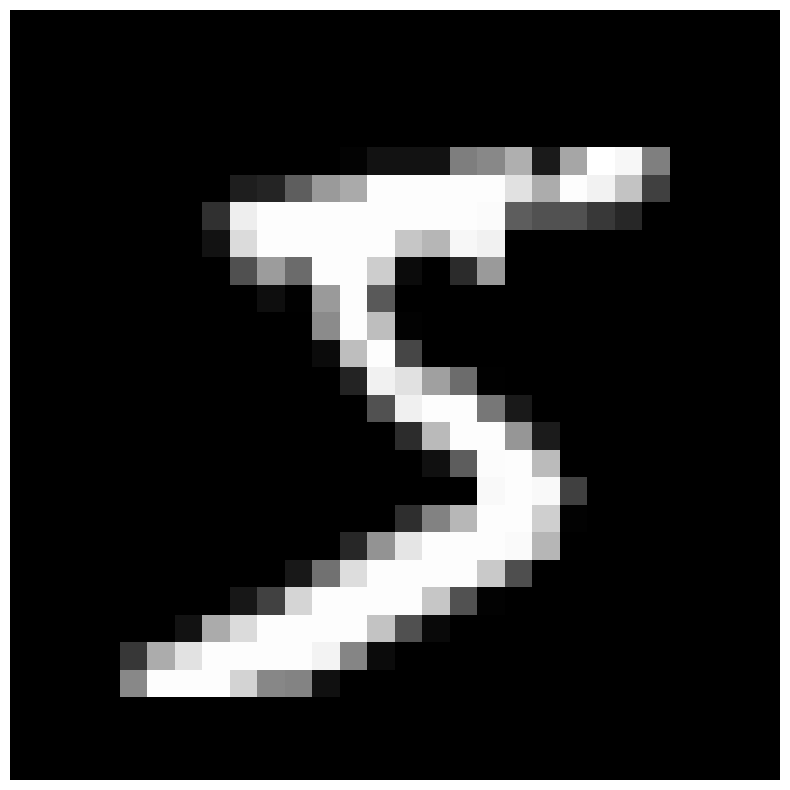

In [3]:
plt.figure(figsize=(10,10)) 
plt.imshow(X_train[0,:,:], cmap="gray") # Primer parámetor es el índice, en este caso la primer imágen
plt.axis("off") # Para que aparezcan las numeraciones en los ejes
plt.show() # Mostrar la imágen

In [4]:
# Crear un modelo secuencial correctamente
model = keras.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(2048, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Imprimir el resumen del modelo
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,661,898 (10.15 MB)

 Trainable params: 2,661,898 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
X_train = np.expand_dims(X_train, axis=1)
print(X_train.shape)

(60000, 1, 28, 28)


In [6]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=20, batch_size=20)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8724 - loss: 5.4748
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9352 - loss: 0.2627
Epoch 3/20
 717/3000 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9531 - loss: 0.1968

: 

In [13]:
X_test = np.load("mnist_test_data.npy")
Y_test = np.load("mnist_test_labels.npy")

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
print(((predictions == Y_test).sum()/len(Y_test))*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
94.0
